Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno


Loading the dataset

In [5]:
df = pd.read_csv("kaggle_diabetes.csv")

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


Exploring The Data

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [10]:
df.Age.unique()

array([47, 23, 31, 24, 21, 58, 28, 67, 42, 33, 45, 22, 66, 30, 25, 55, 39,
       41, 40, 38, 35, 64, 46, 27, 56, 26, 37, 48, 54, 29, 44, 36, 32, 43,
       34, 60, 61, 69, 62, 65, 57, 52, 51, 49, 63, 59, 72, 81, 50, 53, 70,
       68])

In [11]:
df.Age.mode()

,Age
0,22


In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

EDA and Feature Engineering

In [13]:
df[["Glucose" , "BloodPressure" , 'SkinThickness' , 'Insulin' ,'BMI']] = df[["Glucose" , "BloodPressure" , 'SkinThickness' , 'Insulin' ,'BMI']].replace(0 , np.nan)

In [14]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,13
BloodPressure,90
SkinThickness,573
Insulin,956
BMI,28
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

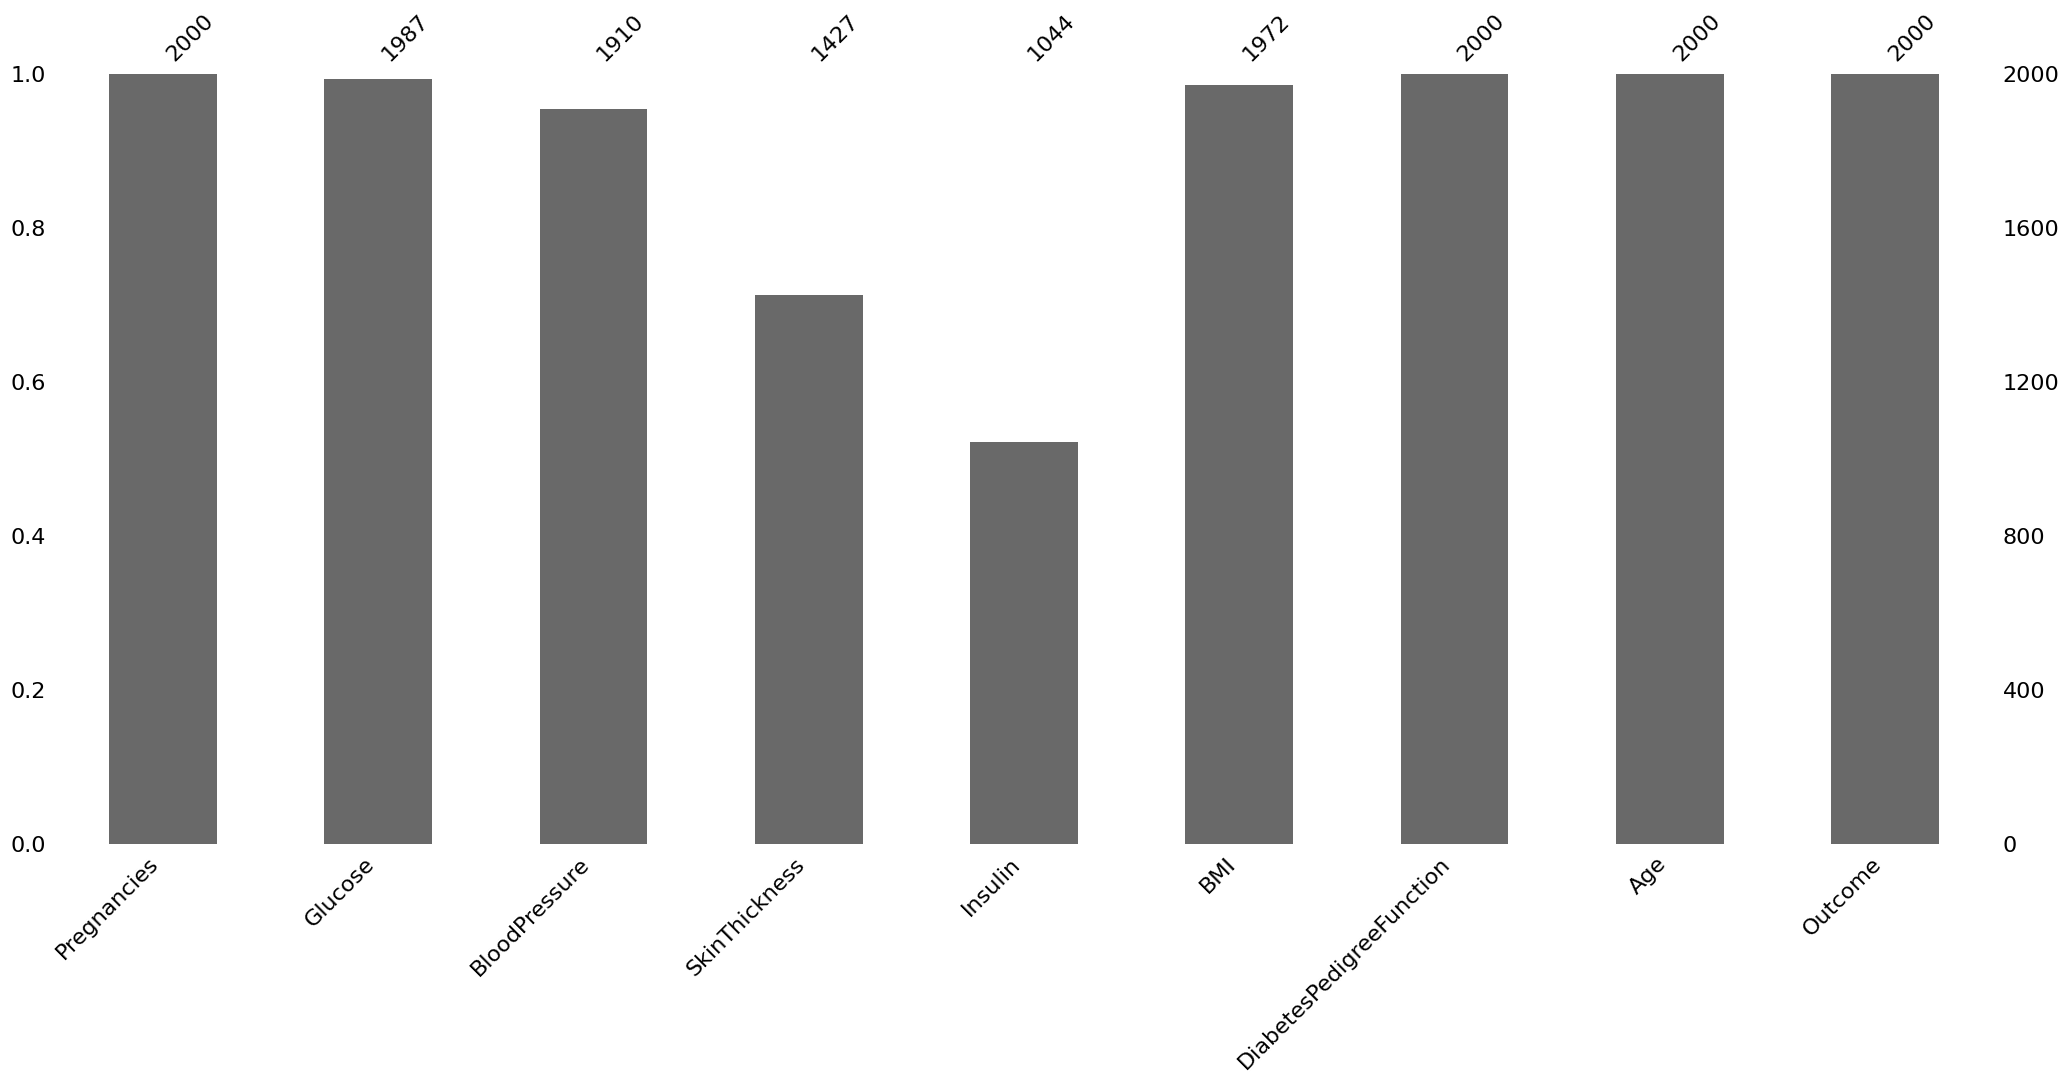

In [15]:
msno.bar(df)

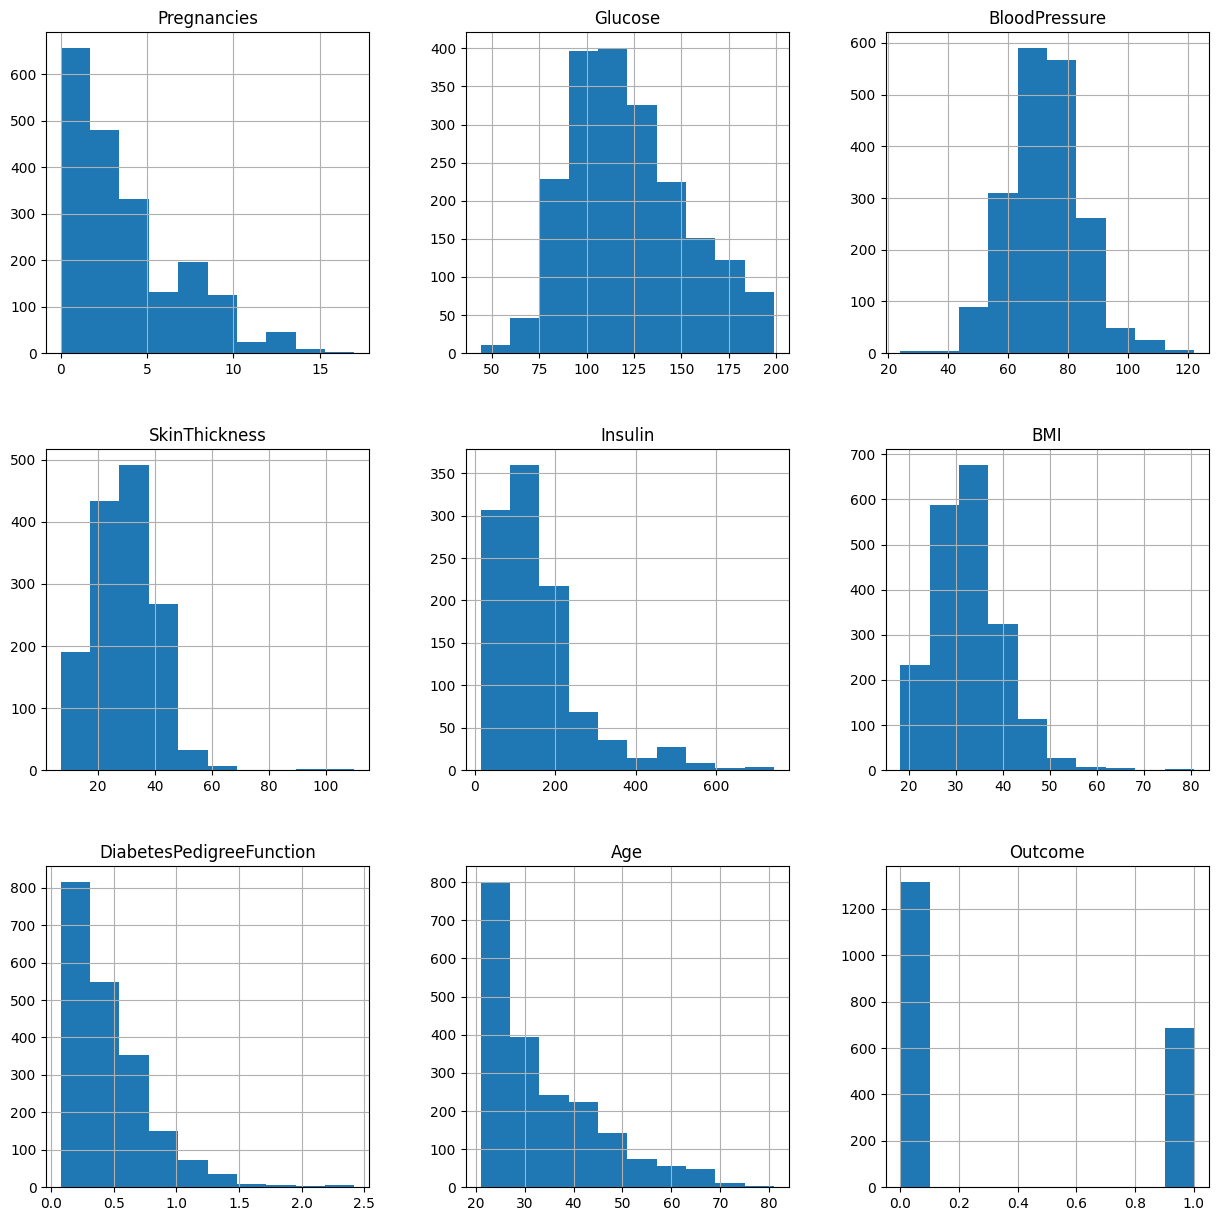

In [16]:
H= df.hist(figsize =(15,15))

In [17]:
df.fillna({"Glucose": df["Glucose"].mean()}, inplace=True)
df.fillna({"BloodPressure" :df['BloodPressure'].mean()} , inplace= True)

In [18]:
df.fillna({'SkinThickness':df['SkinThickness'].median()} , inplace =True)
df.fillna({ 'Insulin':df[ 'Insulin'].median()} , inplace =True)
df.fillna({'BMI':df['BMI'].median()} , inplace =True)

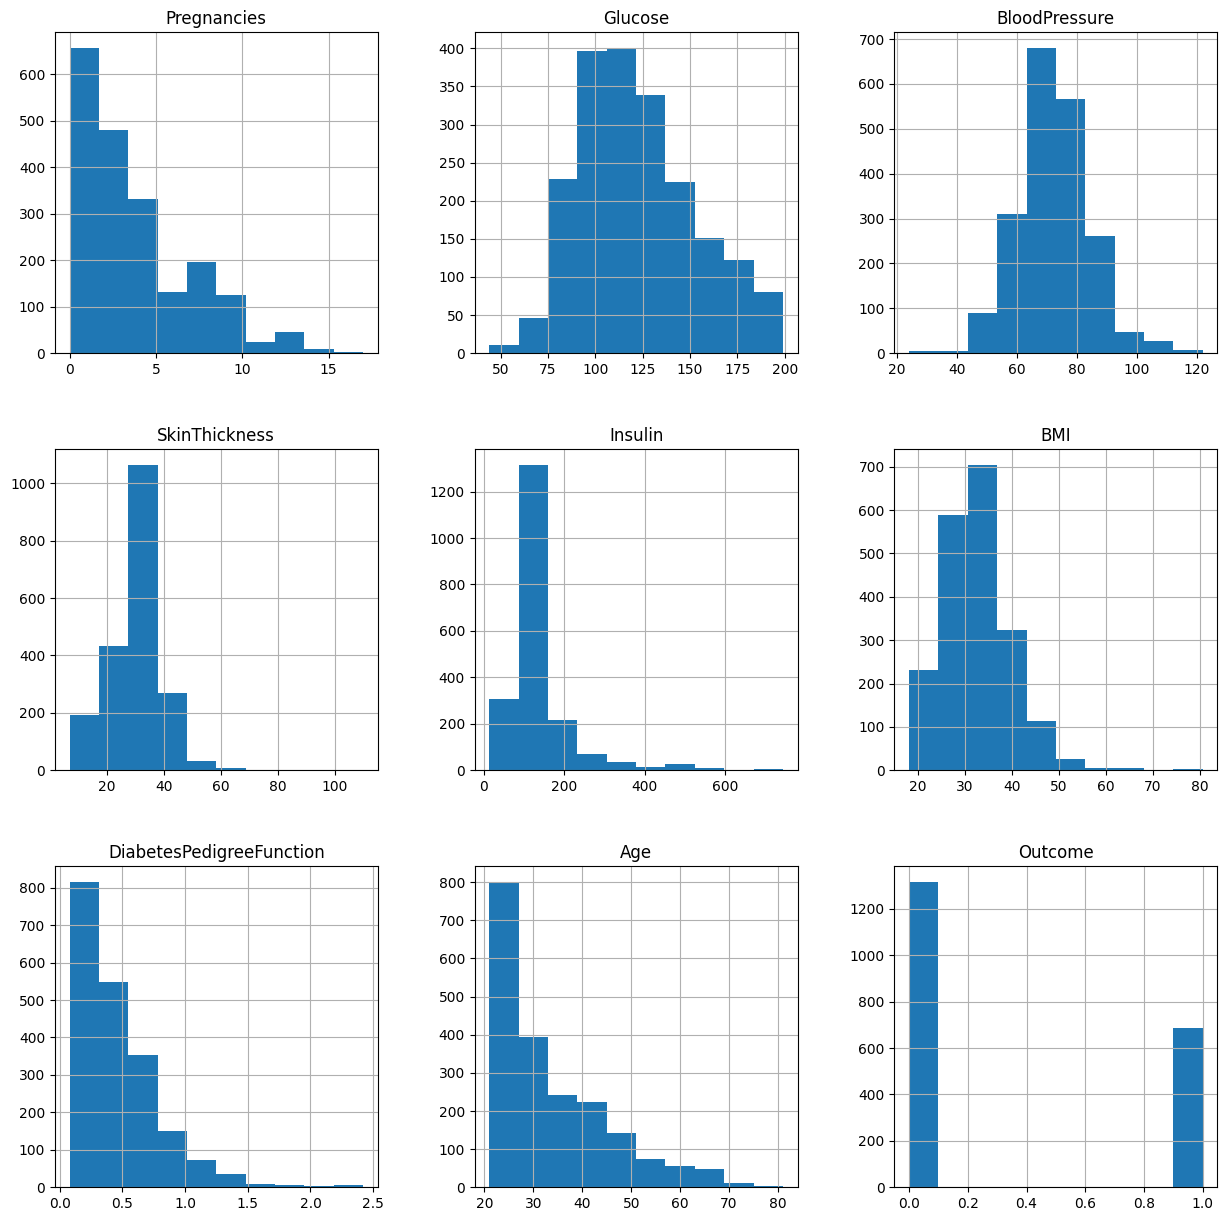

In [19]:
H= df.hist(figsize =(15,15))

In [20]:
Q1 = df["Glucose"].quantile(0.25)
Q3 = df["Glucose"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}\nlower = {lower}\nupper = {upper}")


Q1 = 99.0
Q3 = 141.0
IQR = 42.0
lower = 36.0
upper = 204.0


In [21]:
for feature in df:
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None) and df[(df[feature] < lower)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


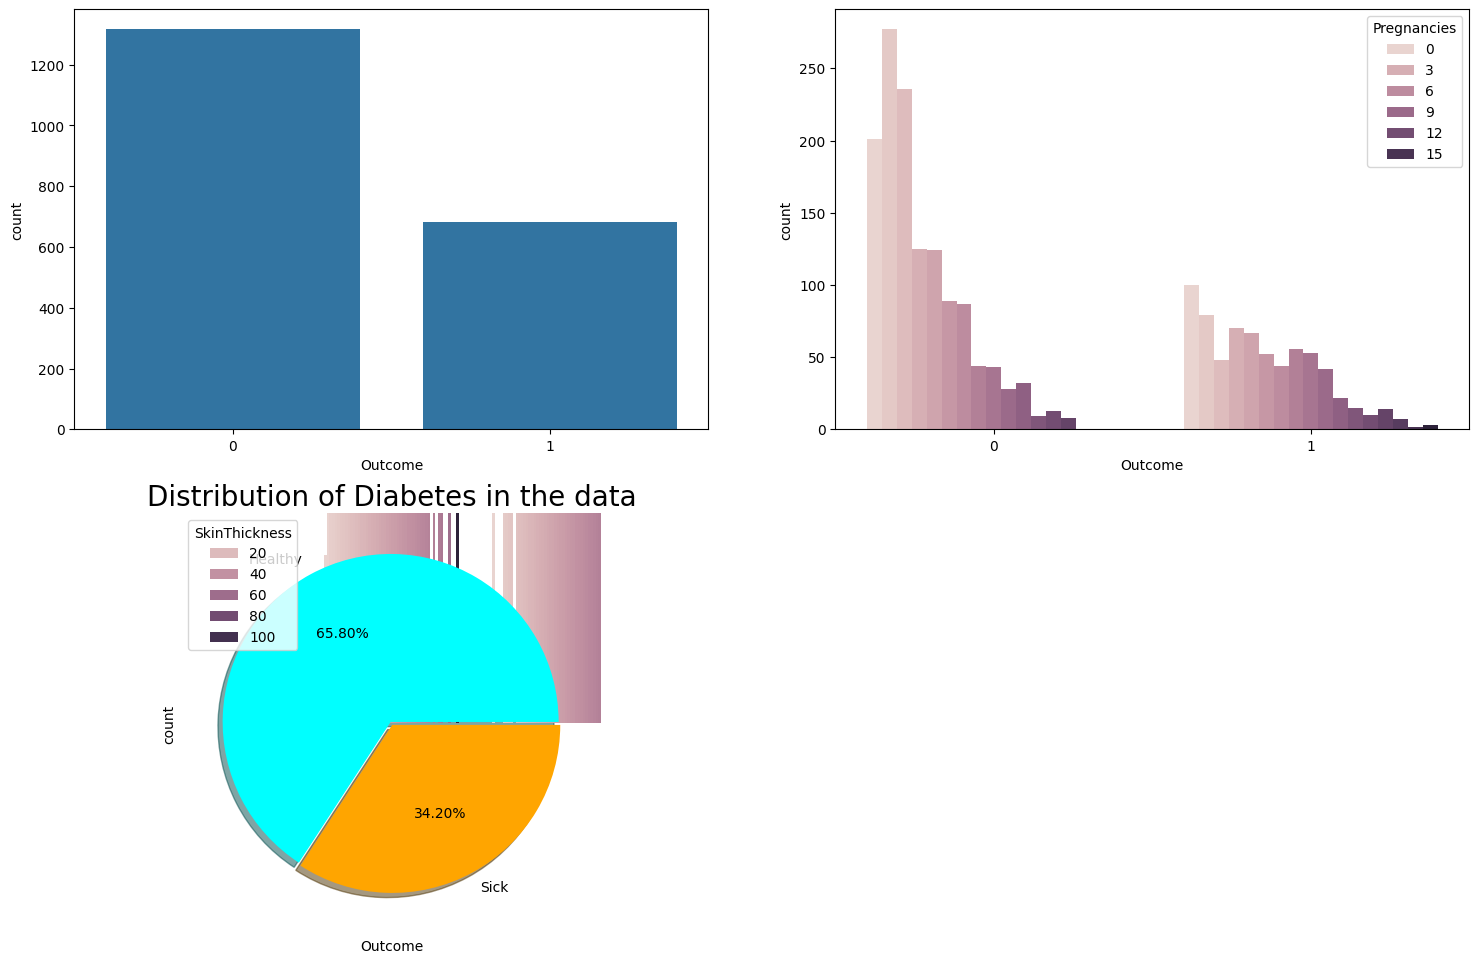

In [22]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='Outcome', data=df)

plt.subplot(2,2,2)
sns.countplot(x='Outcome', hue='Pregnancies', data=df)

plt.subplot(2,2,3)
sns.countplot(x='Outcome', hue='SkinThickness', data=df)
no_dib = df[df.Outcome == 0].count().iloc[0]
dib = df[df.Outcome == 1].count().iloc[0]

plt.title('Distribution of Diabetes in the data', {'fontsize' : 20})
plt.pie([no_dib, dib], labels=['Healthy', 'Sick'], autopct="%.2f%%", explode=[0.01, 0.01], colors=['cyan', 'orange'], shadow=True)

plt.show()


Assign Feature and Target Variable



In [ ]:
from sklearn.model_selection import train_test_split
X= df.drop("Outcome" , axis=1)
y = df['Outcome']

Spliting the data into Training and Testing Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape

(1600, 8)

In [24]:
X_test.shape

(400, 8)

# Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, ShuffleSplit


Modeling

In [27]:
def best_model(X, y):

    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', max_iter=1000),
            'parameters': {
                'C': [1, 5, 10]
            }
        },

        'knn': {
            'model': KNeighborsClassifier(),
            'parameters': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance']
            }
        },

        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10, 15, 20, 50, 100, 200]
            }
        },

        'naive_bayes': {
            'model': GaussianNB(),
            'parameters': {}
        }
    }


    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)


    for model_name, model_info in models.items():
        gs = GridSearchCV(model_info['model'], model_info['parameters'], cv=cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })


    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])

best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.758750
1,knn,"{'n_neighbors': 7, 'weights': 'distance'}",0.948125
2,random_forest,{'n_estimators': 200},0.953750
3,naive_bayes,{},0.740625


In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


In [29]:
model = RandomForestClassifier(n_estimators=20, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [30]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
y_pred = model.predict(X_test)
cm =confusion_matrix(y_test , y_pred)
cm

array([[269,   3],
       [  1, 127]])

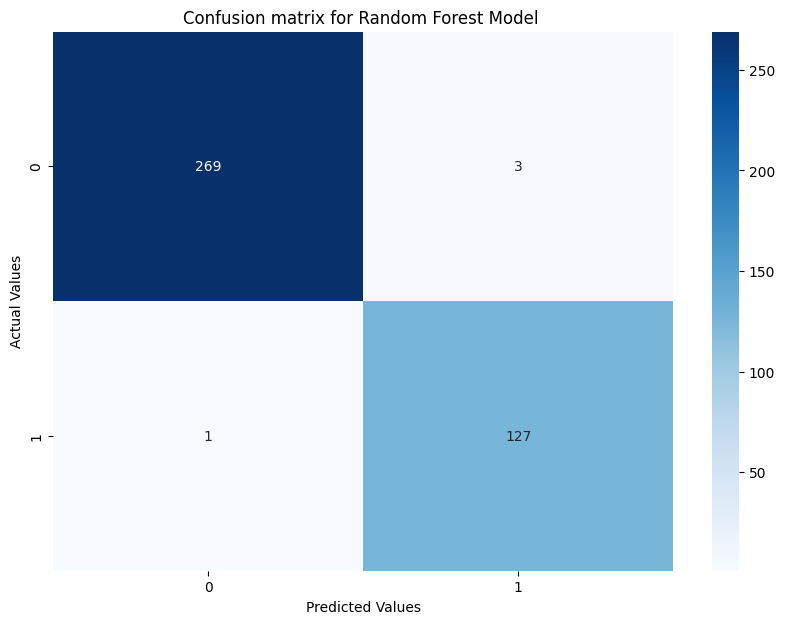

In [31]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Model ')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [32]:
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}%".format(acc*100))

Test Accuracy: 99.0%


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       272
           1       0.98      0.99      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [35]:
y_train_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1043,    1],
       [   1,  555]])

In [36]:
acc = accuracy_score(y_train , y_train_pred)
print("Train Accuracy: {}%".format( acc*100))

Train Accuracy: 99.875%


In [37]:
def prediction(model, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):

    P = int(Pregnancies)
    G = float(Glucose)
    BP = float(BloodPressure)
    ST = float(SkinThickness)
    I = float(Insulin)
    bmi = float(BMI)
    dpf = float(DiabetesPedigreeFunction)
    age = int(Age)


    input_data = [[P, G, BP, ST, I, bmi, dpf, age]]


    input_scaled = sc.transform(input_data)


    result = model.predict(input_scaled)


    if result[0] == 1:
        return " You are likely diabetic."
    else:
        return " You are not likely diabetic."

In [38]:
result = prediction(model, 2, 120, 70, 25, 94, 28.1, 0.5, 30)
print(result)

 You are not likely diabetic.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
